Interpreting data about evaluation on inference time

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# set style of graphs
# ref: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8-dark')
sns.set_palette('tab10')        # default matplotlib color palette, ref: https://seaborn.pydata.org/tutorial/color_palettes.html

# trigger graph save functionality

SAVE_GRAPHS = True

In [2]:
import numpy as np
import pandas as pd

from pathlib import Path
from itertools import product
from datetime import datetime

output_folder = Path('eval_graphs2024')
eval_inference_time_output_folder = output_folder / 'inference_time'
if not eval_inference_time_output_folder.exists():
    eval_inference_time_output_folder.mkdir(parents=True)


tfidf_rf_folder = Path('tfidf-rf_2023-12-16')
glove_cnn_folder = Path('glove-cnn_2023-12-12')
bert_folder = Path('bert_2023-12-13')

tfidf_rf_prefix = 'tfidf-rf-20000'
glove_cnn_prefix = 'glove-cnn-20000'
bert_prefix = 'bert-finetune'

tfidf_rf_date_suffix = datetime(2024, 2, 26)
glove_cnn_date_suffix = datetime(2024, 2, 26)
bert_date_suffix = datetime(2024, 1, 18)

DATASET_SIZE = 480
DATASET_BALANCED = True

EVAL_INFERENCE_TIME_FOLDER = 'inference_times'
EVAL_DEVICES = ['appl_m1max', 'win_i58250U']

load_pairs = list(product([EVAL_INFERENCE_TIME_FOLDER], EVAL_DEVICES))

load_pairs

[('inference_times', 'appl_m1max'), ('inference_times', 'win_i58250U')]

In [3]:
tfidf_rf_inference_times = {}
glove_cnn_inference_times = {}
bert_inference_times = {}

for eval_device in EVAL_DEVICES:
    tfidf_rf_inference_times[eval_device] = {}
    glove_cnn_inference_times[eval_device] = {}
    bert_inference_times[eval_device] = {}

# load tfidf-rf inference times
for folder, prefix, datetime_suffix, inf_times_dict in zip(
    [tfidf_rf_folder, glove_cnn_folder, bert_folder],
    [tfidf_rf_prefix, glove_cnn_prefix, bert_prefix],
    [tfidf_rf_date_suffix, glove_cnn_date_suffix, bert_date_suffix],
    [tfidf_rf_inference_times, glove_cnn_inference_times, bert_inference_times]):
    for eval_folder, eval_device in load_pairs:
        # get the folder path
        model_folder = Path.joinpath(folder, f'{prefix}_{DATASET_SIZE}k_{"bal" if DATASET_BALANCED else "imbal"}_{datetime_suffix.strftime("%Y-%m-%d")}')

        # get the report folder path
        eval_time_folder = Path.joinpath(model_folder, f'{eval_folder}_{eval_device}').resolve()
        print(eval_time_folder)

        # load the inference times which stored in numpy array
        # different model has their own way of storing inference times
        if prefix == tfidf_rf_prefix:
            sklearn_inf_times = np.load(Path.joinpath(eval_time_folder, f'{model_folder.name}_sklearn_inf_times.npy'))
            onnx_inf_times = np.load(Path.joinpath(eval_time_folder, f'{model_folder.name}_onnx_inf_times.npy'))

            tfidf_rf_inference_times[eval_device]['sklearn'] = sklearn_inf_times
            tfidf_rf_inference_times[eval_device]['onnx'] = onnx_inf_times

        elif prefix == glove_cnn_prefix:
            glove_cnn_inf_times = np.load(Path.joinpath(eval_time_folder, f'{model_folder.name}_keras_inf_times.npy'))
            onnx_keras_vect_times = np.load(Path.joinpath(eval_time_folder, f'{model_folder.name}_onnx_keras_vect_times.npy'))
            onnx_inf_times = np.load(Path.joinpath(eval_time_folder, f'{model_folder.name}_onnx_inf_times.npy'))

            glove_cnn_inference_times[eval_device]['keras'] = glove_cnn_inf_times
            glove_cnn_inference_times[eval_device]['onnx_keras_vect'] = onnx_keras_vect_times
            glove_cnn_inference_times[eval_device]['onnx'] = onnx_inf_times

        elif prefix == bert_prefix:
            bert_inf_times = np.load(Path.joinpath(eval_time_folder, f'{model_folder.name}_hg_inf_times.npy'))
            bert_vect_times = np.load(Path.joinpath(eval_time_folder, f'{model_folder.name}_hg_vect_times.npy'))
            onnx_inf_times = np.load(Path.joinpath(eval_time_folder, f'{model_folder.name}_onnx_inf_times.npy'))
            onnx_vect_times = np.load(Path.joinpath(eval_time_folder, f'{model_folder.name}_onnx_vect_times.npy'))

            bert_inference_times[eval_device]['bert'] = bert_inf_times
            bert_inference_times[eval_device]['bert_vect'] = bert_vect_times
            bert_inference_times[eval_device]['onnx'] = onnx_inf_times
            bert_inference_times[eval_device]['onnx_bert_vect'] = onnx_vect_times

        else:
            raise ValueError(f'Unknown model prefix: {prefix}')


# for eval_folder, eval_device in load_pairs:
#     # get the folder path
#     model_folder = Path.joinpath(folder, f'{prefix}_{load_pair[0]}k_{"bal" if load_pair[1] else "imbal"}')

#     # get the report folder path
#     model_report_path = Path.joinpath(model_folder, 'eval_metrics', eval_prefix).resolve()
#     print(model_report_path)

/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/tfidf-rf_2023-12-16/tfidf-rf-20000_480k_bal_2024-02-26/inference_times_appl_m1max
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/tfidf-rf_2023-12-16/tfidf-rf-20000_480k_bal_2024-02-26/inference_times_win_i58250U
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/glove-cnn_2023-12-12/glove-cnn-20000_480k_bal_2024-02-26/inference_times_appl_m1max
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/glove-cnn_2023-12-12/glove-cnn-20000_480k_bal_2024-02-26/inference_times_win_i58250U
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/bert_2023-12-13/bert-finetune_480k_bal_2024-01-18/inference_times_appl_m1max
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/bert_2023-12-13/bert-finetune_480k_bal_2024-01-18/inference_times_win_i58250U


In [4]:
bert_inference_times

{'appl_m1max': {'bert': array([0.04373321, 0.14084475, 0.04595208, ..., 0.04040125, 0.10242175,
         0.04632029]),
  'bert_vect': array([0.00030958, 0.00132821, 0.00041096, ..., 0.00031725, 0.00083775,
         0.00030679]),
  'onnx': array([0.01828004, 0.19246025, 0.03306325, ..., 0.02135433, 0.11425696,
         0.01659538]),
  'onnx_bert_vect': array([0.00027238, 0.00129083, 0.00037296, ..., 0.00026675, 0.00076338,
         0.00026208])},
 'win_i58250U': {'bert': array([0.0762554 , 0.44969251, 0.1050708 , ..., 0.11980735, 0.44312688,
         0.07408592]),
  'bert_vect': array([0.0006054 , 0.0021093 , 0.0006404 , ..., 0.00071706, 0.0017004 ,
         0.00065986]),
  'onnx': array([0.0447128 , 0.4298644 , 0.0752794 , ..., 0.06684286, 0.33155806,
         0.04649677]),
  'onnx_bert_vect': array([0.000572  , 0.0014547 , 0.0006811 , ..., 0.00075389, 0.00126284,
         0.00064729])}}

In [5]:
# create a dataframe for each model

tfidf_rf_df = pd.DataFrame()
glove_cnn_df = pd.DataFrame()
bert_df = pd.DataFrame()

# tfidf-rf
for eval_device in EVAL_DEVICES:
    temp = pd.concat(
        [
        pd.DataFrame({
        'model': 'tfidf-rf',
        'eval_device': eval_device,
        'inference_type': 'vanilla',        # use vanilla to represent native inference
        'inference_time': tfidf_rf_inference_times[eval_device]['sklearn'],
        }), 
        pd.DataFrame({
        'model': 'tfidf-rf',
        'eval_device': eval_device,
        'inference_type': 'onnx_sum',       # use onnx_sum to represent onnx inference with sum for convenience (the model include TFIDFTransformer)
        'inference_time': tfidf_rf_inference_times[eval_device]['onnx'],
        })],
        axis=0
    ).reset_index(drop=True)

    tfidf_rf_df = pd.concat([tfidf_rf_df, temp], axis=0).reset_index(drop=True)

# glove-cnn
for eval_device in EVAL_DEVICES:
    temp = pd.concat(
        [
        pd.DataFrame({
            'model': 'glove-cnn',
            'eval_device': eval_device,
            'inference_type': 'vanilla',    # use vanilla to represent native inference (an end2end model including textvectorizer)
            'inference_time': glove_cnn_inference_times[eval_device]['keras'],
        }),
        pd.DataFrame({
            'model': 'glove-cnn',
            'eval_device': eval_device,
            'inference_type': 'onnx_keras_vect',
            'inference_time': glove_cnn_inference_times[eval_device]['onnx_keras_vect'],
        }),
        pd.DataFrame({
            'model': 'glove-cnn',
            'eval_device': eval_device,
            'inference_type': 'onnx',
            'inference_time': glove_cnn_inference_times[eval_device]['onnx'],
        }),
        pd.DataFrame({
            'model': 'glove-cnn',
            'eval_device': eval_device,
            'inference_type': 'onnx_sum',
            'inference_time': glove_cnn_inference_times[eval_device]['onnx_keras_vect'] + glove_cnn_inference_times[eval_device]['onnx']
        })],
        axis=0
    ).reset_index(drop=True)

    glove_cnn_df = pd.concat([glove_cnn_df, temp], axis=0).reset_index(drop=True)

# bert
for eval_device in EVAL_DEVICES:
    temp = pd.concat(
        [
            pd.DataFrame({
            'model': 'bert',
            'eval_device': eval_device,
            'inference_type': 'bert',
            'inference_time': bert_inference_times[eval_device]['bert'],
            }),
            pd.DataFrame({
                'model': 'bert',
                'eval_device': eval_device,
                'inference_type': 'bert_vect',
                'inference_time': bert_inference_times[eval_device]['bert_vect'],
            }),
            pd.DataFrame({
                'model': 'bert',
                'eval_device': eval_device,
                'inference_type': 'vanilla',        # use vanilla instead of bert_sum for convenience, a sum including tokenizer and model itself
                'inference_time': bert_inference_times[eval_device]['bert'] + bert_inference_times[eval_device]['bert_vect'],
            }),
            pd.DataFrame({
                'model': 'bert',
                'eval_device': eval_device,
                'inference_type': 'onnx',
                'inference_time': bert_inference_times[eval_device]['onnx'],
            }),
            pd.DataFrame({
                'model': 'bert',
                'eval_device': eval_device,
                'inference_type': 'onnx_bert_vect',
                'inference_time': bert_inference_times[eval_device]['onnx_bert_vect'],
            }),
            pd.DataFrame({
                'model': 'bert',
                'eval_device': eval_device,
                'inference_type': 'onnx_sum',
                'inference_time': bert_inference_times[eval_device]['onnx'] + bert_inference_times[eval_device]['onnx_bert_vect'],
            })
        ],
        axis=0
    ).reset_index(drop=True)

    bert_df = pd.concat([bert_df, temp], axis=0).reset_index(drop=True)

In [6]:
glove_cnn_df

,model,eval_device,inference_type,inference_time
0,glove-cnn,appl_m1max,vanilla,0.036032
1,glove-cnn,appl_m1max,vanilla,0.036961
2,glove-cnn,appl_m1max,vanilla,0.037362
3,glove-cnn,appl_m1max,vanilla,0.037974
4,glove-cnn,appl_m1max,vanilla,0.034210
...,...,...,...,...
15995,glove-cnn,win_i58250U,onnx_sum,0.016074
15996,glove-cnn,win_i58250U,onnx_sum,0.012368
15997,glove-cnn,win_i58250U,onnx_sum,0.011291
15998,glove-cnn,win_i58250U,onnx_sum,0.011802


Create plot for two devices

first is windows device

In [7]:
# create a dataframe for plotting window inference time

tfidf_rf_df_winplot = tfidf_rf_df[tfidf_rf_df['eval_device'] == 'win_i58250U'].reset_index(drop=True)
glove_cnn_df_winplot = glove_cnn_df[glove_cnn_df['eval_device'] == 'win_i58250U'].reset_index(drop=True)
bert_df_winplot = bert_df[bert_df['eval_device'] == 'win_i58250U'].reset_index(drop=True)

glove_cnn_df_winplot = glove_cnn_df_winplot[(glove_cnn_df_winplot['inference_type'] == 'onnx_sum') | (glove_cnn_df_winplot['inference_type'] == 'vanilla')].reset_index(drop=True)
bert_df_winplot = bert_df_winplot[(bert_df_winplot['inference_type'] == 'onnx_sum') | (bert_df_winplot['inference_type'] == 'vanilla')].reset_index(drop=True)

In [8]:
bert_df_winplot

,model,eval_device,inference_type,inference_time
0,bert,win_i58250U,vanilla,0.076861
1,bert,win_i58250U,vanilla,0.451802
2,bert,win_i58250U,vanilla,0.105711
3,bert,win_i58250U,vanilla,0.069393
4,bert,win_i58250U,vanilla,0.175135
...,...,...,...,...
3995,bert,win_i58250U,onnx_sum,0.029848
3996,bert,win_i58250U,onnx_sum,0.045125
3997,bert,win_i58250U,onnx_sum,0.067597
3998,bert,win_i58250U,onnx_sum,0.332821


In [9]:
# concat all three df into one and then plot

all_df_winplot = pd.concat([tfidf_rf_df_winplot, glove_cnn_df_winplot, bert_df_winplot], axis=0).reset_index(drop=True)

# times the inference_time by 1000 -> inference_time reflects ms
all_df_winplot['inference_time'] = all_df_winplot['inference_time'] * 1000

/var/folders/hm/n8540hpn7xd1f0pw3_qnsp4r0000gn/T/ipykernel_8513/695612837.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['TFIDF-RF', 'GloVe-CNN', 'BERT'])


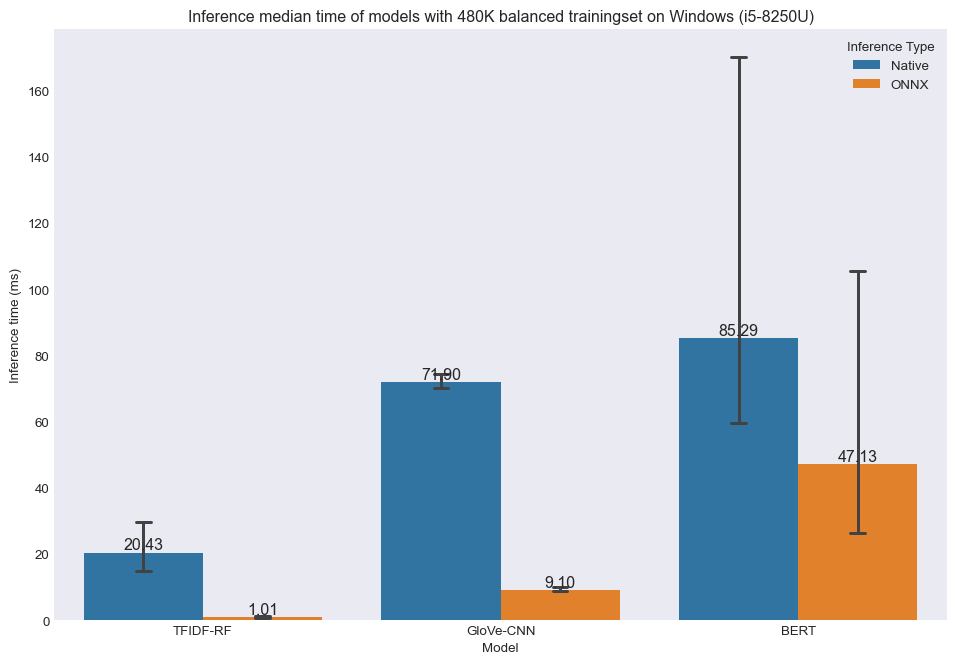

In [10]:
# box plot in seaborn

plt.figure(figsize=(12, 8), dpi=96)

ax = sns.barplot(x='model', y='inference_time', hue='inference_type', data=all_df_winplot, estimator=np.median, errorbar=('pi', 50), capsize=0.1)
ax.set_title('Inference median time of models with 480K balanced trainingset on Windows (i5-8250U)')
ax.set_xlabel('Model')
ax.set_ylabel('Inference time (ms)')
ax.set(xticklabels=['TFIDF-RF', 'GloVe-CNN', 'BERT'])
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Native', 'ONNX'], title='Inference Type')

ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=12)
ax.bar_label(ax.containers[1], fmt='%.2f', fontsize=12)

if SAVE_GRAPHS:
    ax.get_figure().savefig(Path.joinpath(eval_inference_time_output_folder, 'inference_time_win_i58250U.png'), bbox_inches='tight', dpi=600, facecolor='w')


plt.show()

/var/folders/hm/n8540hpn7xd1f0pw3_qnsp4r0000gn/T/ipykernel_8513/2774663790.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['TFIDF-RF', 'GloVe-CNN', 'BERT'])


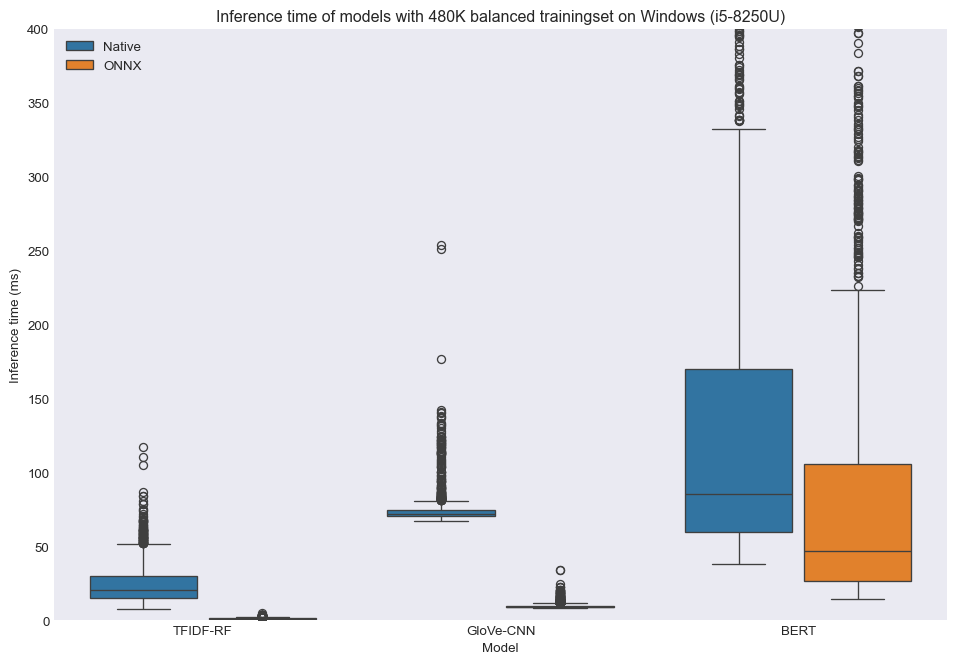

In [11]:
# plot box chart with sns

plt.figure(figsize=(12, 8), dpi=96)
ax = sns.boxplot(x='model', y='inference_time', hue='inference_type', data=all_df_winplot, gap=.1)
ax.set_title('Inference time of models with 480K balanced trainingset on Windows (i5-8250U)')
ax.set_ylabel('Inference time (ms)')
ax.set_xlabel('Model')
ax.set_ylim(0, 400)
ax.set(xticklabels=['TFIDF-RF', 'GloVe-CNN', 'BERT'])
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Native', 'ONNX'], loc='upper left')

plt.show()

Then the apple device

In [12]:
tfidf_rf_df_applplot = tfidf_rf_df[tfidf_rf_df['eval_device'] == 'appl_m1max'].reset_index(drop=True)
glove_cnn_df_applplot = glove_cnn_df[glove_cnn_df['eval_device'] == 'appl_m1max'].reset_index(drop=True)
bert_df_applplot = bert_df[bert_df['eval_device'] == 'appl_m1max'].reset_index(drop=True)

glove_cnn_df_applplot = glove_cnn_df_applplot[(glove_cnn_df_applplot['inference_type'] == 'onnx_sum') | (glove_cnn_df_applplot['inference_type'] == 'vanilla')].reset_index(drop=True)
bert_df_applplot = bert_df_applplot[(bert_df_applplot['inference_type'] == 'onnx_sum') | (bert_df_applplot['inference_type'] == 'vanilla')].reset_index(drop=True)

# concat all three df into one and then plot

all_df_applplot = pd.concat([tfidf_rf_df_applplot, glove_cnn_df_applplot, bert_df_applplot], axis=0).reset_index(drop=True)

# times the inference_time by 1000 -> inference_time reflects ms
all_df_applplot['inference_time'] = all_df_applplot['inference_time'] * 1000

/var/folders/hm/n8540hpn7xd1f0pw3_qnsp4r0000gn/T/ipykernel_8513/2510477330.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['TFIDF-RF', 'GloVe-CNN', 'BERT'])


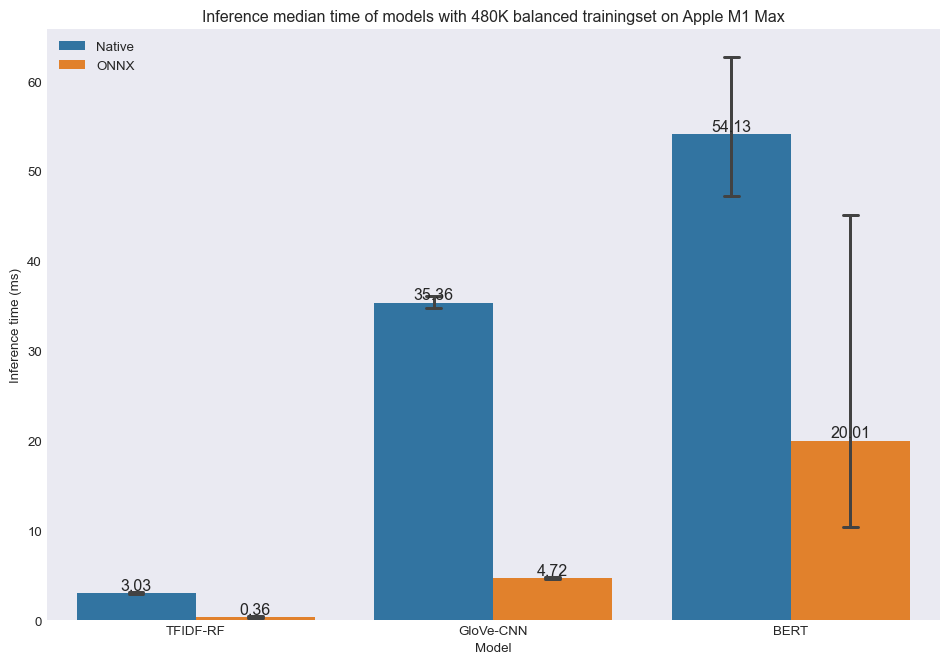

In [14]:
# plot the bar chart with sns

plt.figure(figsize=(12, 8), dpi=96)
ax = sns.barplot(x='model', y='inference_time', hue='inference_type', data=all_df_applplot, estimator=np.median, errorbar=('pi', 50), capsize=.1)
ax.set_title('Inference median time of models with 480K balanced trainingset on Apple M1 Max')
ax.set_ylabel('Inference time (ms)')
ax.set_xlabel('Model')
ax.set(xticklabels=['TFIDF-RF', 'GloVe-CNN', 'BERT'])
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Native', 'ONNX'], loc='upper left')

ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=12)
ax.bar_label(ax.containers[1], fmt='%.2f', fontsize=12)

if SAVE_GRAPHS:
    ax.get_figure().savefig(Path.joinpath(eval_inference_time_output_folder, 'inference_time_appl_m1max.png'), bbox_inches='tight', dpi=600, facecolor='w')

plt.show()
